In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/My Drive/ml

/content/gdrive/My Drive/ml


In [0]:
"""
!pip install sh
from sh import gunzip

gunzip('Lab0609.tar.gz')

"""

"\n!pip install sh\nfrom sh import gunzip\n\ngunzip('Lab0609.tar.gz')\n\n"

In [0]:
"""
import tarfile
tar = tarfile.open("Lab0609.tar")
tar.extractall()
tar.close()
"""

'\nimport tarfile\ntar = tarfile.open("Lab0609.tar")\ntar.extractall()\ntar.close()\n'

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

A2348.jpg


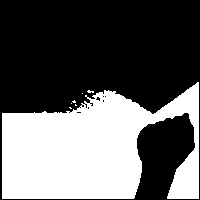

A1157.jpg


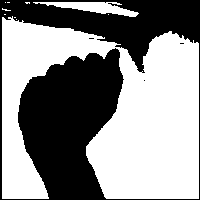

A1817.jpg


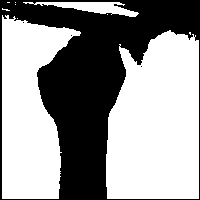

B1108.jpg


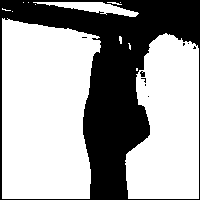

B2664.jpg


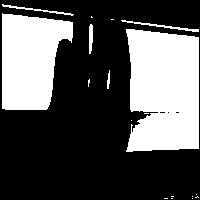

B1616.jpg


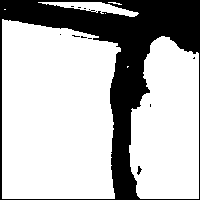

C309.jpg


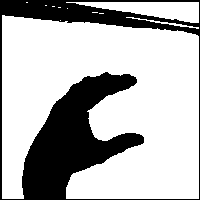

C2214.jpg


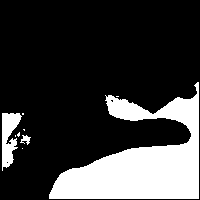

C415.jpg


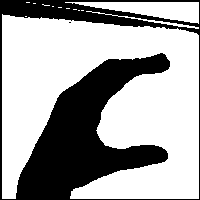

I2545.jpg


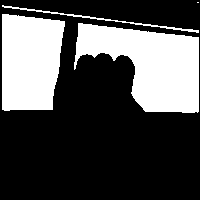

I1981.jpg


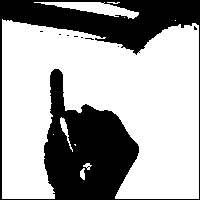

I2894.jpg


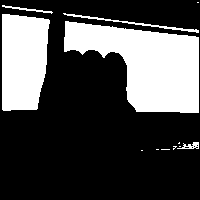

F1311.jpg


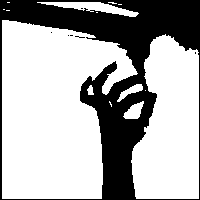

F2690.jpg


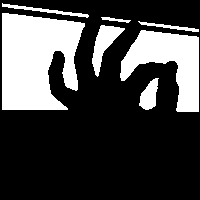

F1080.jpg


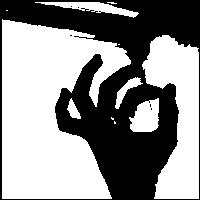

nothing1242.jpg


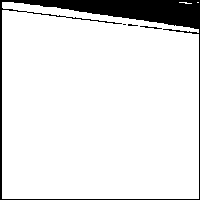

nothing521.jpg


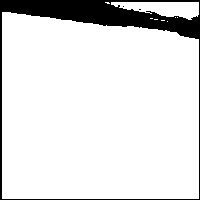

nothing42.jpg


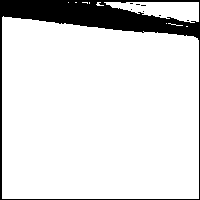

G2555.jpg


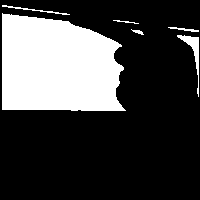

G1757.jpg


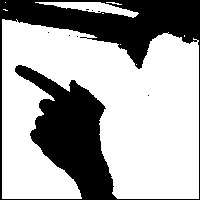

G2027.jpg


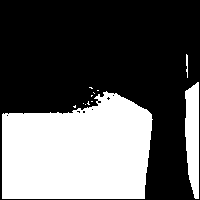

D2549.jpg


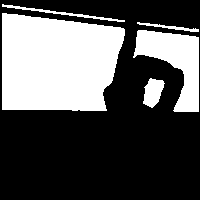

D436.jpg


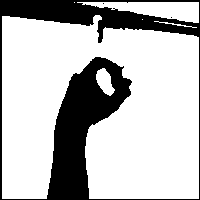

D244.jpg


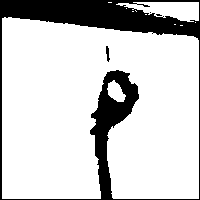

E535.jpg


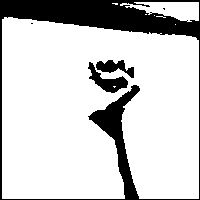

E1740.jpg


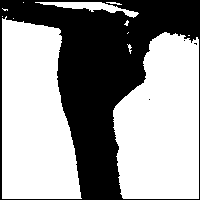

E375.jpg


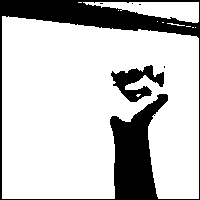

H1823.jpg


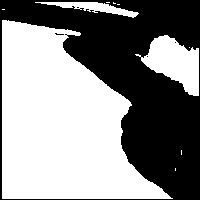

H370.jpg


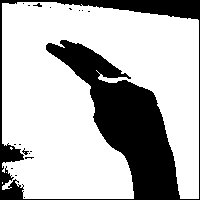

H702.jpg


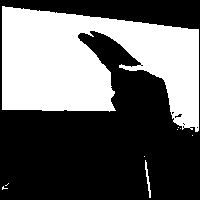

In [0]:
for item in os.listdir('Lab0609'):
  i = 0
  for image in os.listdir('Lab0609/'+item):
    img=cv2.imread('Lab0609/'+item+'/'+image)
    i+=1
    if i%10 == 0:
      print(image)
      gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      ret2,th2 = cv2.threshold(gray_img,5,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
      cv2_imshow(th2)
    if i%50 == 0:
      break

A2348.jpg


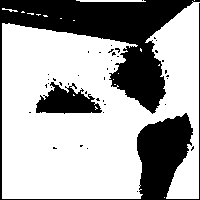

A1157.jpg


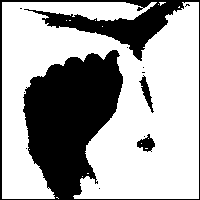

A1817.jpg


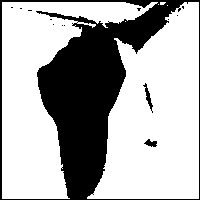

B1108.jpg


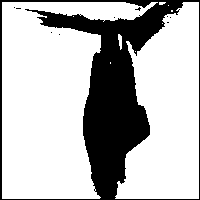

B2664.jpg


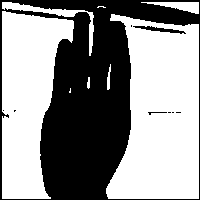

B1616.jpg


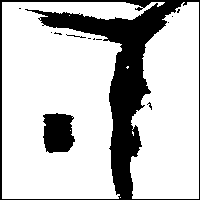

C309.jpg


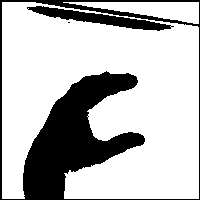

C2214.jpg


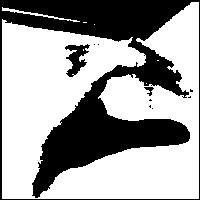

C415.jpg


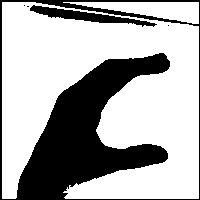

I2545.jpg


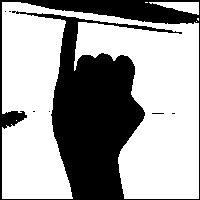

I1981.jpg


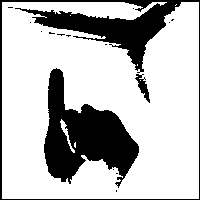

I2894.jpg


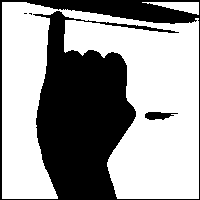

F1311.jpg


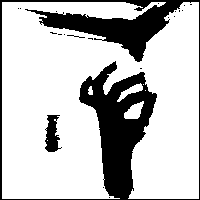

F2690.jpg


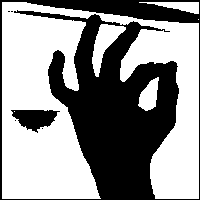

F1080.jpg


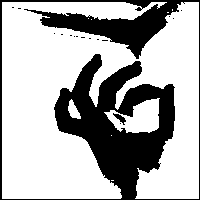

nothing1242.jpg


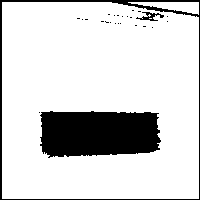

nothing521.jpg


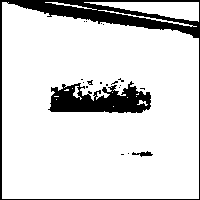

nothing42.jpg


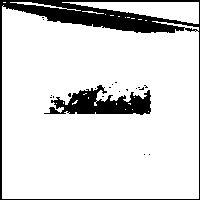

G2555.jpg


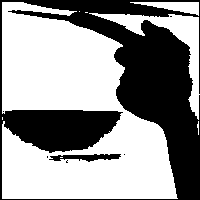

G1757.jpg


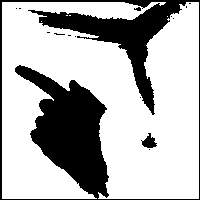

G2027.jpg


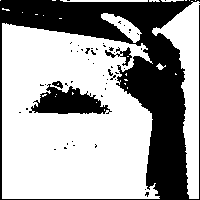

D2549.jpg


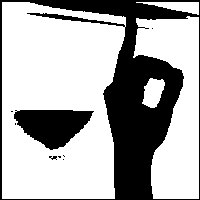

D436.jpg


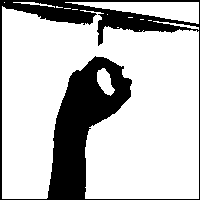

D244.jpg


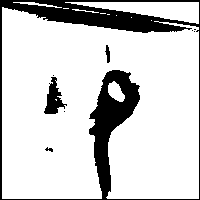

E535.jpg


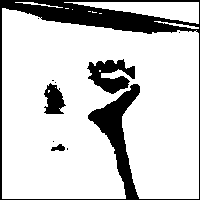

E1740.jpg


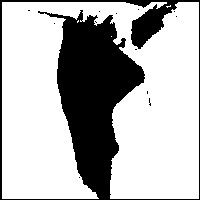

E375.jpg


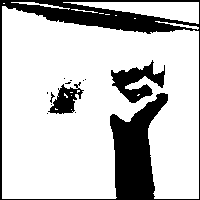

H1823.jpg


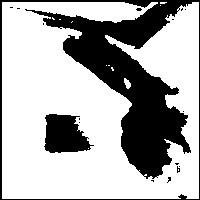

H370.jpg


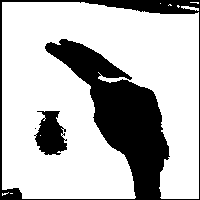

H702.jpg


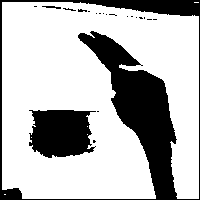

In [0]:
for item in os.listdir('Lab0609'):
  i=0
  for image in os.listdir('Lab0609/'+item):
    img=cv2.imread('Lab0609/'+item+'/'+image)
    i+=1
    if i%10 == 0:
      print(image)
      gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      thresh_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,100,2)
    
      cv2_imshow(thresh_img)

    if i%50 == 0:
      break

In [0]:
# labelling index

label2index = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'nothing':9}

In [0]:
import pickle

removing the board part

In [0]:
adaptive_feature = list()
feature_label = list()
i = 0
for item in os.listdir('Lab0609'):
  for image in os.listdir('Lab0609/'+item):
    i+=1
    if i%1000 == 0:
      print('Creating Features for path: Lab0609/'+item+'/'+image)
    img=cv2.imread('Lab0609/'+item+'/'+image)
    gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,100,2)
    thresh_img = thresh_img[40:160, 40:160]
    x1 = np.sum(thresh_img, axis=1)
    x2 = np.sum(thresh_img, axis=0)
    x = np.zeros(shape=(240,))
    x[:120] = x1
    x[120:] = x2
    x = x/255
    x = list(x)

    adaptive_feature.append(x)
    feature_label.append(label2index[item])

Creating Features for path: Lab0609/A/A915.jpg
Creating Features for path: Lab0609/A/A2617.jpg
Creating Features for path: Lab0609/A/A181.jpg
Creating Features for path: Lab0609/B/B2463.jpg
Creating Features for path: Lab0609/B/B1219.jpg
Creating Features for path: Lab0609/B/B1239.jpg
Creating Features for path: Lab0609/C/C1194.jpg
Creating Features for path: Lab0609/C/C326.jpg
Creating Features for path: Lab0609/C/C1103.jpg
Creating Features for path: Lab0609/I/I956.jpg
Creating Features for path: Lab0609/I/I289.jpg
Creating Features for path: Lab0609/I/I2172.jpg
Creating Features for path: Lab0609/F/F516.jpg
Creating Features for path: Lab0609/F/F1904.jpg
Creating Features for path: Lab0609/F/F2949.jpg
Creating Features for path: Lab0609/nothing/nothing316.jpg
Creating Features for path: Lab0609/nothing/nothing1546.jpg
Creating Features for path: Lab0609/nothing/nothing506.jpg
Creating Features for path: Lab0609/G/G1882.jpg
Creating Features for path: Lab0609/G/G982.jpg
Creating Feat

In [0]:
print(set(feature_label))
df = pd.DataFrame(columns = ['Features', 'Label'])
df['Features'] = adaptive_feature
df['Label'] = feature_label
df.to_csv('Pattern_features.csv')




{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


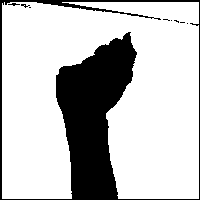

In [0]:
img=cv2.imread('Lab0609/A/A3.jpg')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh_img = cv2.threshold(gray_img,50,255,cv2.THRESH_BINARY)
cv2_imshow(thresh_img)


In [0]:
print(thresh_img.shape)
print(thresh_img)

(200, 200)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255   0]
 ...
 [  0   0 255 ... 255 255   0]
 [  0   0 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


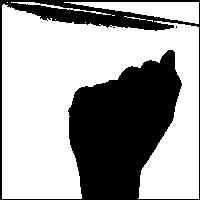

In [0]:
# Adaptive Thresholding with 85 as threshold

img=cv2.imread('Lab0609/A/A111.jpg')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh_img = cv2.adaptiveThreshold(gray_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,85,2)
cv2_imshow(thresh_img)

In [0]:
print(thresh_img.shape)
print(thresh_img)

(200, 200)
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255   0]
 ...
 [  0   0 255 ... 255 255   0]
 [  0   0 255 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


In [0]:
df = pd.read_csv('Pattern_features.csv')
df.head()

,Unnamed: 0,Features,Label
0,0,"[89.0, 93.0, 95.0, 101.0, 104.0, 107.0, 98.0, ...",0
1,1,"[91.0, 98.0, 102.0, 108.0, 115.0, 117.0, 116.0...",0
2,2,"[87.0, 96.0, 101.0, 99.0, 104.0, 106.0, 104.0,...",0
3,3,"[48.0, 48.0, 48.0, 47.0, 47.0, 47.0, 47.0, 45....",0
4,4,"[89.0, 100.0, 101.0, 106.0, 109.0, 112.0, 112....",0


In [0]:
len(df)

30000

In [0]:
# list with features and label

adaptive_feature = list()
feature_label = list()

for i in range(30000):

  if i%5000 == 0:
    print(i)

  x = df.iloc[i]['Features']
  y = df.iloc[i]['Label']
  x = x.replace(',',' ')
  x = list(map(float,x[1:-1].strip().split()))

  adaptive_feature.append(x)
  feature_label.append(y)

0
5000
10000
15000
20000
25000


In [0]:
import pickle

with open("adaptive_feature.txt", "wb") as fp: 
  pickle.dump(adaptive_feature, fp)

with open("feature_label.txt", "wb") as fp: 
  pickle.dump(feature_label, fp)


In [0]:
# Dividing and Checking data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(adaptive_feature, feature_label, test_size=0.3, random_state=41)
print(len(X_train))
print(X_train[0])
print(y_train[0])
print(type(y_train[0]))
print(type(X_train[0][0]))
print(type(np.array(X_train[0])))

21000
[71.0, 77.0, 87.0, 91.0, 94.0, 91.0, 92.0, 93.0, 95.0, 98.0, 98.0, 96.0, 96.0, 98.0, 98.0, 98.0, 100.0, 99.0, 101.0, 102.0, 103.0, 104.0, 106.0, 106.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 106.0, 106.0, 106.0, 106.0, 106.0, 106.0, 105.0, 106.0, 107.0, 108.0, 106.0, 105.0, 106.0, 107.0, 108.0, 108.0, 109.0, 108.0, 110.0, 110.0, 110.0, 110.0, 112.0, 111.0, 111.0, 112.0, 113.0, 115.0, 115.0, 115.0, 114.0, 116.0, 117.0, 116.0, 117.0, 116.0, 117.0, 118.0, 118.0, 119.0, 119.0, 120.0, 120.0, 120.0, 105.0, 93.0, 93.0, 75.0, 75.0, 69.0, 67.0, 67.0, 68.0, 69.0, 67.0, 62.0, 58.0, 56.0, 57.0, 56.0, 55.0, 55.0, 53.0, 54.0, 56.0, 52.0, 50.0, 53.0, 53.0, 52.0, 53.0, 56.0, 58.0, 66.0, 74.0, 81.0, 83.0, 90.0, 92.0, 93.0, 94.0, 95.0, 95.0, 95.0, 94.0, 94.0, 93.0, 92.0, 92.0, 91.0, 120.0, 120.0, 120.0, 120.0, 116.0, 110.0, 105.0, 99.0, 92.0, 87.0, 88.0, 87.0, 87.0, 88.0, 90.0, 92.0, 94.0, 95.0, 99.0, 101.0, 103.0, 101.0, 103.0, 106.0, 107.0, 109.0, 112.0, 114.0, 114.0, 114.0, 117.0, 117.0, 119

In [0]:
# Running SVM lib model

from sklearn import svm

clf = svm.SVC(C=5.0, kernel='rbf', gamma='scale')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score, classification_report

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9487777777777778


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       930
           1       0.93      0.95      0.94       905
           2       0.99      0.98      0.99       914
           3       0.95      0.96      0.96       881
           4       0.89      0.89      0.89       903
           5       0.96      0.95      0.95       915
           6       0.91      0.96      0.94       918
           7       0.96      0.96      0.96       867
           8       0.97      0.92      0.94       899
           9       1.00      1.00      1.00       868

    accuracy                           0.95      9000
   macro avg       0.95      0.95      0.95      9000
weighted avg       0.95      0.95      0.95      9000



In [0]:
clf = svm.SVC(C=10.0, kernel='poly', gamma=0.1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [0]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9578888888888889


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       930
           1       0.95      0.96      0.96       905
           2       0.99      0.99      0.99       914
           3       0.95      0.97      0.96       881
           4       0.90      0.89      0.90       903
           5       0.96      0.94      0.95       915
           6       0.94      0.97      0.95       918
           7       0.98      0.98      0.98       867
           8       0.98      0.94      0.96       899
           9       1.00      1.00      1.00       868

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



In [0]:
from sklearn.model_selection import GridSearchCV

clf = svm.SVC()
grid_values = {'gamma': [0.1, 1.0],'C':[1.0, 10.0], 'kernel':['poly', 'rbf']}
grid_clf = GridSearchCV(clf, param_grid = grid_values, scoring = 'accuracy', cv=10, n_jobs=-1)
grid_clf.fit(X_train, y_train)

y_pred = grid_clf.predict(X_test)

#print('Accuracy: ', accuracy_score(y_test, y_pred))


![alt text](https://)**Couldn't complete it within colab runtime reconnection**

In [0]:
# Gridsearchcv was not responding under colab runtime so running loop to check hyperparameters.

grid_values = {'gamma': [0.1, 1.0],'C':[1.0, 10.0], 'kernel':['poly', 'rbf']}



for gammas in grid_values['gamma']:
  for Cs in grid_values['C']:
    for kernels in grid_values['kernel']:
      clf = svm.SVC(C=Cs, kernel=kernels, gamma=gammas)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      print('gamma: {}, C: {}, kernels: {}, Accuracy: {}'.format(gammas,Cs,kernels, accuracy_score(y_test,y_pred)))


gamma: 0.1, C: 1.0, kernels: poly, Accuracy: 0.9578888888888889
gamma: 0.1, C: 1.0, kernels: rbf, Accuracy: 0.09633333333333334
gamma: 0.1, C: 10.0, kernels: poly, Accuracy: 0.9578888888888889
gamma: 0.1, C: 10.0, kernels: rbf, Accuracy: 0.09633333333333334
gamma: 1.0, C: 1.0, kernels: poly, Accuracy: 0.9577777777777777
gamma: 1.0, C: 1.0, kernels: rbf, Accuracy: 0.09633333333333334
gamma: 1.0, C: 10.0, kernels: poly, Accuracy: 0.9577777777777777
gamma: 1.0, C: 10.0, kernels: rbf, Accuracy: 0.09633333333333334


In [0]:
#Taking the best Parameters

clf = svm.SVC(C=10.0, kernel='poly', gamma=0.1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [0]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9578888888888889


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       930
           1       0.95      0.96      0.96       905
           2       0.99      0.99      0.99       914
           3       0.95      0.97      0.96       881
           4       0.90      0.89      0.90       903
           5       0.96      0.94      0.95       915
           6       0.94      0.97      0.95       918
           7       0.98      0.98      0.98       867
           8       0.98      0.94      0.96       899
           9       1.00      1.00      1.00       868

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



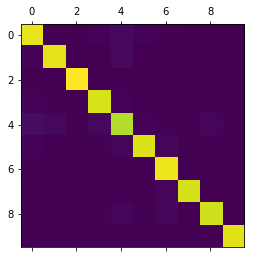

In [0]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test, y_pred))